In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

In [11]:
df = pd.read_csv(r"data\\190819_file24_concat.csv", index_col=0, header=None).T
df

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
1,0.296508,0.431993,0.329875,0.329262,0.313243,0.300434,0.310191,0.334434,0.358874,0.377755,...,-0.132274,-0.126352,-0.164520,-0.144568,-0.160394,-0.158001,-0.137934,-0.151954,-0.106800,-0.113254
2,-0.491238,-0.303480,-0.237546,-0.182344,-0.115005,-0.043841,0.012246,0.008646,0.055190,0.029882,...,-0.272702,-0.271406,-0.301274,-0.305918,-0.284776,-0.302474,-0.280474,-0.305179,-0.272161,-0.261600
3,-0.356916,-0.210573,-0.189948,-0.146712,-0.132396,-0.137262,-0.124111,-0.141096,-0.128547,-0.142951,...,-0.158225,-0.163993,-0.174008,-0.149095,-0.172899,-0.153569,-0.180166,-0.217366,-0.196468,-0.162200
4,-0.581451,-0.325331,-0.263738,-0.192541,-0.152212,-0.110454,-0.095994,-0.048779,-0.029438,-0.031285,...,-0.318650,-0.306391,-0.321976,-0.310384,-0.335079,-0.342648,-0.322169,-0.331147,-0.318088,-0.287726
5,-0.406185,0.049042,0.223303,0.310755,0.273653,0.322463,0.270237,0.289675,0.217254,0.223146,...,-0.087267,-0.102270,-0.088442,-0.120767,-0.097628,-0.099681,-0.109340,-0.100381,-0.112223,-0.146520
6,-0.491532,-0.242878,-0.172337,-0.046181,-0.022043,0.008252,-0.002097,0.047246,0.073609,0.025948,...,-0.147970,-0.121380,-0.139929,-0.118718,-0.153542,-0.143904,-0.091643,-0.125647,-0.102496,-0.104305
7,-0.712955,-0.395644,-0.257366,-0.176899,-0.058378,0.029430,0.097120,0.162038,0.212004,0.181956,...,-0.163295,-0.204561,-0.243606,-0.232796,-0.233837,-0.235268,-0.229560,-0.227804,-0.208095,-0.210606
8,-0.508001,-0.175635,-0.104859,-0.063473,-0.038040,-0.038478,-0.044894,-0.021612,-0.026005,-0.034017,...,-0.087562,-0.110684,-0.132727,-0.093640,-0.131504,-0.135890,-0.120205,-0.144377,-0.095987,-0.111213
9,-0.474422,-0.267464,-0.289981,-0.203153,-0.206636,-0.184895,-0.130857,-0.138437,-0.116137,-0.172102,...,-0.144269,-0.138267,-0.115335,-0.095760,-0.114834,-0.185995,-0.147181,-0.152166,-0.139313,-0.146945
10,-0.405779,-0.097706,-0.076881,-0.084713,-0.039811,-0.079621,-0.112943,-0.095134,-0.036978,-0.098834,...,-0.069992,-0.083283,-0.143760,-0.118643,-0.134014,-0.098957,-0.115319,-0.125815,-0.138462,-0.127641


,0.0,0.37453183520599254,0.7490636704119851,1.1235955056179776,1.4981273408239701,1.8726591760299627,2.247191011235955,2.6217228464419478,2.9962546816479403,3.370786516853933,...,71.16104868913858,71.53558052434457,71.91011235955057,72.28464419475655,72.65917602996255,73.03370786516854,73.40823970037454,73.78277153558052,74.15730337078652,74.53183520599251
1,0.296508,0.431993,0.329875,0.329262,0.313243,0.300434,0.310191,0.334434,0.358874,0.377755,...,-0.132274,-0.126352,-0.164520,-0.144568,-0.160394,-0.158001,-0.137934,-0.151954,-0.106800,-0.113254
2,-0.491238,-0.303480,-0.237546,-0.182344,-0.115005,-0.043841,0.012246,0.008646,0.055190,0.029882,...,-0.272702,-0.271406,-0.301274,-0.305918,-0.284776,-0.302474,-0.280474,-0.305179,-0.272161,-0.261600
3,-0.356916,-0.210573,-0.189948,-0.146712,-0.132396,-0.137262,-0.124111,-0.141096,-0.128547,-0.142951,...,-0.158225,-0.163993,-0.174008,-0.149095,-0.172899,-0.153569,-0.180166,-0.217366,-0.196468,-0.162200
4,-0.581451,-0.325331,-0.263738,-0.192541,-0.152212,-0.110454,-0.095994,-0.048779,-0.029438,-0.031285,...,-0.318650,-0.306391,-0.321976,-0.310384,-0.335079,-0.342648,-0.322169,-0.331147,-0.318088,-0.287726
5,-0.406185,0.049042,0.223303,0.310755,0.273653,0.322463,0.270237,0.289675,0.217254,0.223146,...,-0.087267,-0.102270,-0.088442,-0.120767,-0.097628,-0.099681,-0.109340,-0.100381,-0.112223,-0.146520
6,-0.491532,-0.242878,-0.172337,-0.046181,-0.022043,0.008252,-0.002097,0.047246,0.073609,0.025948,...,-0.147970,-0.121380,-0.139929,-0.118718,-0.153542,-0.143904,-0.091643,-0.125647,-0.102496,-0.104305
7,-0.712955,-0.395644,-0.257366,-0.176899,-0.058378,0.029430,0.097120,0.162038,0.212004,0.181956,...,-0.163295,-0.204561,-0.243606,-0.232796,-0.233837,-0.235268,-0.229560,-0.227804,-0.208095,-0.210606
8,-0.508001,-0.175635,-0.104859,-0.063473,-0.038040,-0.038478,-0.044894,-0.021612,-0.026005,-0.034017,...,-0.087562,-0.110684,-0.132727,-0.093640,-0.131504,-0.135890,-0.120205,-0.144377,-0.095987,-0.111213
9,-0.474422,-0.267464,-0.289981,-0.203153,-0.206636,-0.184895,-0.130857,-0.138437,-0.116137,-0.172102,...,-0.144269,-0.138267,-0.115335,-0.095760,-0.114834,-0.185995,-0.147181,-0.152166,-0.139313,-0.146945
10,-0.405779,-0.097706,-0.076881,-0.084713,-0.039811,-0.079621,-0.112943,-0.095134,-0.036978,-0.098834,...,-0.069992,-0.083283,-0.143760,-0.118643,-0.134014,-0.098957,-0.115319,-0.125815,-0.138462,-0.127641


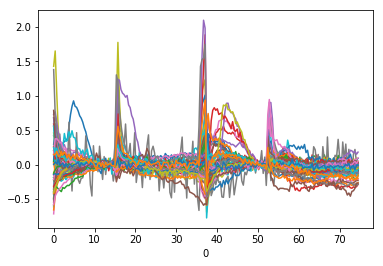

In [12]:
# convert to seconds
frameToSec = lambda frame: frame / 2.67

newColNames = {}
for frame in list(df):
    newColNames[frame] = frameToSec(int(frame))
df.rename(columns=newColNames, inplace=True)
df.T.plot(legend=False)
df

,21.348314606741575,21.722846441947567,22.09737827715356,22.471910112359552,22.846441947565545,23.220973782771537,23.59550561797753,23.970037453183522,24.344569288389515,24.719101123595507,...,71.16104868913858,71.53558052434457,71.91011235955057,72.28464419475655,72.65917602996255,73.03370786516854,73.40823970037454,73.78277153558052,74.15730337078652,74.53183520599251
1,0.054898,0.059274,0.110333,0.085228,0.117504,0.157665,0.114209,0.092427,0.127532,0.132466,...,-0.132274,-0.126352,-0.164520,-0.144568,-0.160394,-0.158001,-0.137934,-0.151954,-0.106800,-0.113254
2,-0.086828,-0.063994,-0.039146,-0.034184,-0.035105,-0.037431,-0.036886,-0.031515,-0.045505,-0.046836,...,-0.272702,-0.271406,-0.301274,-0.305918,-0.284776,-0.302474,-0.280474,-0.305179,-0.272161,-0.261600
3,-0.124524,-0.118761,-0.087588,-0.115427,-0.092616,-0.106663,-0.088770,-0.135683,-0.108579,-0.082913,...,-0.158225,-0.163993,-0.174008,-0.149095,-0.172899,-0.153569,-0.180166,-0.217366,-0.196468,-0.162200
4,-0.130936,-0.126456,-0.087064,-0.054865,-0.097106,-0.086930,-0.104773,-0.134747,-0.093151,-0.061386,...,-0.318650,-0.306391,-0.321976,-0.310384,-0.335079,-0.342648,-0.322169,-0.331147,-0.318088,-0.287726
5,-0.027453,-0.055129,-0.020446,-0.080729,-0.023628,0.015636,-0.034248,-0.036917,-0.061932,-0.045196,...,-0.087267,-0.102270,-0.088442,-0.120767,-0.097628,-0.099681,-0.109340,-0.100381,-0.112223,-0.146520
6,-0.069263,-0.051091,-0.066456,-0.032568,-0.011923,-0.048742,-0.020855,-0.067974,-0.049249,-0.030686,...,-0.147970,-0.121380,-0.139929,-0.118718,-0.153542,-0.143904,-0.091643,-0.125647,-0.102496,-0.104305
7,-0.112230,-0.087575,-0.125845,-0.125642,-0.120402,-0.115169,-0.123188,-0.155169,-0.151646,-0.174361,...,-0.163295,-0.204561,-0.243606,-0.232796,-0.233837,-0.235268,-0.229560,-0.227804,-0.208095,-0.210606
8,-0.034491,-0.009185,-0.009878,0.003326,0.017781,0.005078,0.021030,-0.030152,-0.005138,-0.009569,...,-0.087562,-0.110684,-0.132727,-0.093640,-0.131504,-0.135890,-0.120205,-0.144377,-0.095987,-0.111213
9,-0.082230,-0.102687,-0.060965,-0.096056,-0.087135,-0.091860,-0.129847,-0.171983,-0.107398,-0.048029,...,-0.144269,-0.138267,-0.115335,-0.095760,-0.114834,-0.185995,-0.147181,-0.152166,-0.139313,-0.146945
10,-0.076257,-0.029092,-0.008068,-0.016731,0.054896,0.000968,0.022357,-0.044946,-0.037778,-0.026628,...,-0.069992,-0.083283,-0.143760,-0.118643,-0.134014,-0.098957,-0.115319,-0.125815,-0.138462,-0.127641


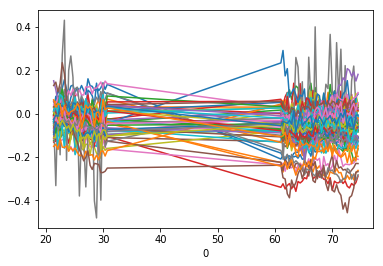

In [19]:
base = df[[c for c in list(df) if ((int(c) > 20 and int(c) < 31) or (int(c) > 60))]].copy()
base.T.plot(legend=False)
base

In [40]:
bstd = base.std(axis=1)
bmean = base.mean(axis=1)

In [75]:
std_multiplier_threshold = 20
keep = set()
for row in list(df.index.values):
    if row in keep:
        continue
    for col in list(df):
        if (df[col][row] > bmean[row] + bstd[row] * std_multiplier_threshold or
           df[col][row] < bmean[row] - bstd[row] * std_multiplier_threshold):
            keep.add(row)
            break
keep     

{5, 15, 19, 24, 31, 37, 40, 45, 46, 47}

,0.0,0.37453183520599254,0.7490636704119851,1.1235955056179776,1.4981273408239701,1.8726591760299627,2.247191011235955,2.6217228464419478,2.9962546816479403,3.370786516853933,...,71.16104868913858,71.53558052434457,71.91011235955057,72.28464419475655,72.65917602996255,73.03370786516854,73.40823970037454,73.78277153558052,74.15730337078652,74.53183520599251
5,-0.406185,0.049042,0.223303,0.310755,0.273653,0.322463,0.270237,0.289675,0.217254,0.223146,...,-0.087267,-0.102270,-0.088442,-0.120767,-0.097628,-0.099681,-0.109340,-0.100381,-0.112223,-0.146520
37,-0.217757,-0.084781,-0.048607,-0.018548,-0.016243,-0.000654,0.048536,0.018951,0.013313,0.019465,...,-0.018083,0.012203,-0.009202,0.005307,-0.035629,-0.038209,-0.012168,-0.021070,-0.029275,-0.055012
40,0.557794,0.187519,0.107101,0.022125,-0.007495,-0.001273,-0.061594,-0.016064,0.009326,-0.067421,...,0.001951,-0.023924,-0.003837,0.014267,-0.068835,0.004139,-0.065486,-0.012255,0.008034,-0.012050
45,0.680371,0.475071,0.316735,0.190626,0.063111,-0.000647,-0.002238,-0.013075,0.007798,-0.041636,...,0.022389,-0.037023,-0.028195,0.019810,0.023309,0.023619,0.039439,-0.013821,0.025237,0.021553
46,0.786523,0.368304,0.232016,0.098742,0.026306,-0.008484,-0.059181,-0.039366,-0.049896,-0.039642,...,0.060267,0.012037,0.032565,0.045827,0.022005,0.064871,0.010360,0.060532,0.028397,0.028127
15,0.418318,0.380339,0.249922,0.245061,0.182866,0.143012,0.111600,0.109344,0.093987,0.060562,...,-0.000335,0.007897,-0.008857,-0.021945,0.009515,-0.035124,-0.030948,-0.031321,-0.011874,-0.016474
47,0.146531,0.374801,0.374441,0.353271,0.314264,0.324471,0.253622,0.215382,0.239832,0.066151,...,0.028160,0.053999,-0.043607,-0.018371,0.003065,-0.006033,0.026914,0.047473,0.017126,0.051657
19,1.425565,1.647967,1.041906,0.504385,0.284658,0.126463,0.077546,-0.001170,0.108221,-0.000581,...,0.060888,0.052790,-0.001637,0.044187,0.074897,0.050833,0.079401,0.030175,0.093506,0.030236
24,0.590192,0.410056,0.361572,0.185089,0.208509,0.085347,0.100640,0.055411,0.068063,0.012288,...,-0.096073,-0.092846,-0.107160,-0.127794,-0.040307,-0.079623,-0.100908,-0.061099,-0.068341,-0.073800
31,0.554667,0.419531,0.217198,0.092706,0.013023,-0.009892,-0.063212,-0.030838,-0.035489,-0.037168,...,0.006109,-0.016814,0.019402,0.014610,-0.020797,-0.014912,-0.037427,-0.008006,-0.031544,-0.010192


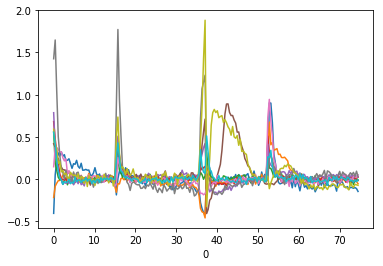

In [63]:
k = list(keep)
select = df.loc[k].copy()
select.T.plot(legend=False)
select

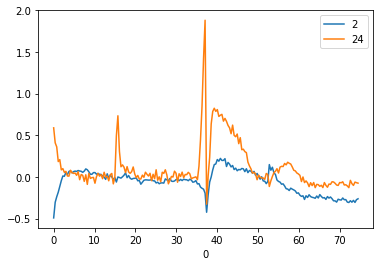

In [73]:
bad = df.loc[[2, 24]].copy()
bad.T.plot()